0.0034568047443265305


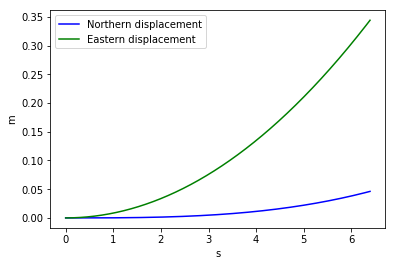

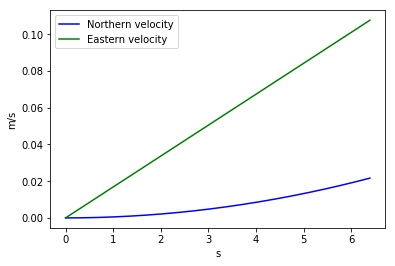

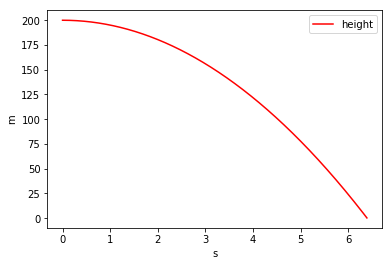

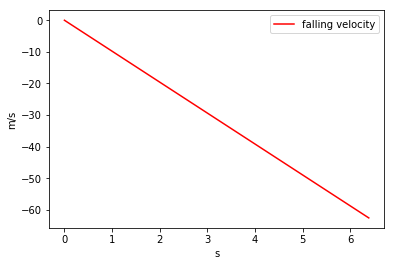

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

o=7.292e-5
g=9.8
R=6.371e6*o*o/g
print(R)
def xyz_int(u,t,psi):
    return u[1], 2*(u[3]*np.sin(psi)-u[5]*np.cos(psi)),u[3],0.5*R*np.sin(2*psi)-2.0*np.sin(psi)*u[1],u[5],-1+R*np.cos(psi)*np.cos(psi)+2*np.cos(psi)*u[1]

#R=6.371e6
u_0=np.array([0.0, 0.0, 0.0, 0.0, 200*o*o/g, 0.0])
psi=42.0308*np.pi/180
t=np.linspace(0,0.000466,10000)
XYZ= odeint(xyz_int, u_0, t, args=(psi,))
ux_sol=XYZ[:, 0]
ux1_sol=XYZ[:, 1]
uy_sol=XYZ[:, 2]
uy1_sol=XYZ[:, 3]
uz_sol=XYZ[:, 4]
uz1_sol=XYZ[:, 5]

#o=7.292e-5
#g=9.8
plt.plot(t/o,ux_sol*g/o/o,"b",label='Northern displacement')
plt.plot(t/o,uy_sol*g/o/o,"g",label='Eastern displacement')
#plt.plot(t/o,uz_sol*g/o/o,"r")
plt.xlabel('s',fontsize=10)
plt.ylabel('m',fontsize=10)
plt.legend()
plt.show()

plt.plot(t/o,ux1_sol*g/o,"b",label='Northern velocity')
plt.plot(t/o,uy1_sol*g/o,"g",label='Eastern velocity')
#plt.plot(t/o,uz1_sol*g/o,"r")
plt.xlabel('s',fontsize=10)
plt.ylabel('m/s',fontsize=10)
plt.legend()
plt.show()

plt.plot(t/o,uz_sol*g/o/o,"r", label='height')
plt.legend()
plt.xlabel('s',fontsize=10)
plt.ylabel('m',fontsize=10)
plt.show()

plt.plot(t/o,uz1_sol*g/o,"r",label='falling velocity')
plt.legend()
plt.xlabel('s',fontsize=10)
plt.ylabel('m/s',fontsize=10)
plt.show()




In [4]:
def x(t,phi):
    return ((o**2/g)**(0.5))*((g*t**2)**(1.5))*np.cos(phi)/3

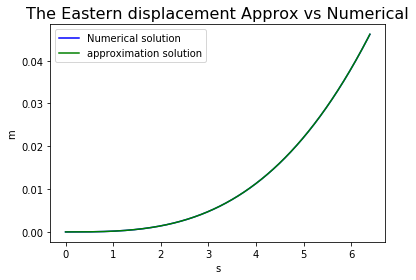

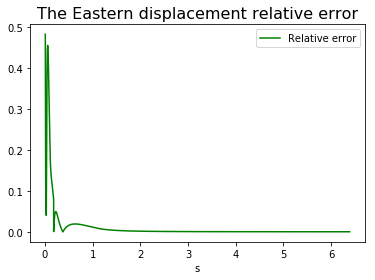

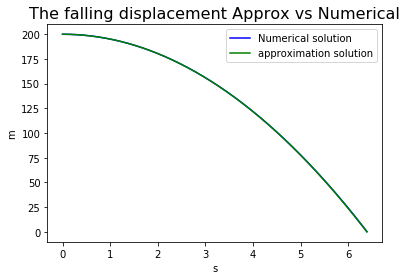

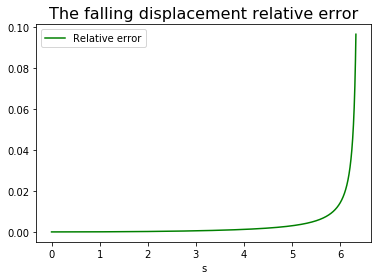

In [6]:

plt.title('The Eastern displacement Approx vs Numerical', fontsize=16)
plt.plot(t/o,ux_sol*g/o/o,"b",label='Numerical solution')
plt.plot(t/o,x(t/o,psi),"g",label='approximation solution')
#plt.plot(t/o,uz1_sol*g/o,"r")
plt.xlabel('s',fontsize=10)
plt.ylabel('m',fontsize=10)
plt.legend()
plt.show()

plt.title('The Eastern displacement relative error', fontsize=16)
plt.plot(t[10:]/o,np.abs(-ux_sol[10:]*g/o/o+x(t[10:]/o,psi))/x(t[10:]/o,psi),"g",label='Relative error')
plt.xlabel('s',fontsize=10)
plt.legend()
plt.show()

plt.plot(t/o,uz_sol*g/o/o,"b",label='Numerical solution')
plt.plot(t/o,200-0.5*g*(t/o)**2,"g",label='approximation solution')
#plt.plot(t/o,uz1_sol*g/o,"r")
plt.title('The falling displacement Approx vs Numerical', fontsize=16)
plt.xlabel('s',fontsize=10)
plt.ylabel('m',fontsize=10)
plt.legend()
plt.show()

plt.title('The falling displacement relative error', fontsize=16)
plt.plot(t[:9900]/o,np.abs(uz_sol[:9900]*g/o/o-200+0.5*g*(t[:9900]/o)**2)/(200-0.5*g*(t[:9900]/o)**2),"g",label='Relative error')
plt.xlabel('s',fontsize=10)
plt.legend()
plt.show()